# **Natural Language Processing**

In [2]:
import bs4 as bs
import urllib. request
import nltk
import spacy

## Marcação POS

O POS (part-of-speech) atribui para as palavras partes da fala, como substantivos, adjetivos, verbos e assim por diante. Ele é importante para a detecção de entidades no texto.

In [4]:
pln = spacy.load('pt_core_news_sm')
print(pln)

In [6]:
documento = pln('Estou aprendendo processamento de linguagem natural, curso em Curitiba')
print(type(documento))

for token in documento:
    print(token.text, token.pos_)

<class 'spacy.tokens.doc.Doc'>
Estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natural ADJ
, PUNCT
curso NOUN
em ADP
Curitiba PROPN


## Lematização e Stamização

In [7]:
for token in documento:
    print(token.text, token.lemma_)

Estou estar
aprendendo aprender
processamento processamento
de de
linguagem linguagem
natural natural
, ,
curso curso
em em
Curitiba Curitiba


In [8]:
doc = pln('encontrei encontraram encontrarão encontrariam cursando curso cursei')
[token.lemma_ for token in doc]

['encontrar',
 'encontrar',
 'encontrar',
 'encontrar',
 'cursar',
 'curso',
 'cursar']

In [12]:
# stemização
nltk.download('rslp');
stemmer = nltk.stem.RSLPStemmer();
print(stemmer.stem('aprender'));

aprend


[nltk_data] Downloading package rslp to
[nltk_data]     /Users/gustavomeira/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [10]:
for token in documento:
    print(token.text, token.lemma_, stemmer.stem(token.text))

Estou estar est
aprendendo aprender aprend
processamento processamento process
de de de
linguagem linguagem lingu
natural natural natur
, , ,
curso curso curs
em em em
Curitiba Curitiba curitib


## Carregamento de Textos

In [13]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [14]:
dados = dados.read()
print(dados)

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-appearance-disabled vector-feature-appearance-pinned-clientpref-0 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned

In [18]:
dados_html = bs.BeautifulSoup(dados, 'html.parser')
print(dados_html)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-appearance-disabled vector-feature-appearance-pinned-clientpref-0 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-men

In [20]:
paragrafos = dados_html.find_all('p')
len(paragrafos)

64

In [30]:
display(paragrafos[0].text)

conteudo = ''
for p in paragrafos:
    conteudo += p.text

conteudo = conteudo.lower()
print(conteudo)

'A inteligência artificial (de sigla: IA; do inglês: artificial intelligence, de sigla: AI) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.[1][2] É também um conjunto de novas tecnologias que permitem aos aparelhos smart executarem várias funções avançadas de modo quase autônomo,[2][3] representanto um marco histórico na computação moderna.[3] Embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplina.\n'

a inteligência artificial (de sigla: ia; do inglês: artificial intelligence, de sigla: ai) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.[1][2] é também um conjunto de novas tecnologias que permitem aos aparelhos smart executarem várias funções avançadas de modo quase autônomo,[2][3] representanto um marco histórico na computação moderna.[3] embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplina.
algumas das principais áreas relacionadas à ia incluem:
é difícil definir especificamente a inteligência artificial, mas ao longo do tempo seguiu essas quatro linhas de pensamento:[1]
é um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[4] é possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma 

## Busca em Textos

In [33]:
pln = spacy.load('pt_core_news_sm')

string = 'turing'
token_pesquisa = pln(string)

In [34]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_pesquisa)

In [35]:
doc = pln(conteudo)
matches = matcher(doc)
display(matches)

[(8661325627334373315, 3463, 3464),
 (8661325627334373315, 3473, 3474),
 (8661325627334373315, 3629, 3630),
 (8661325627334373315, 3634, 3635),
 (8661325627334373315, 3640, 3641),
 (8661325627334373315, 3703, 3704),
 (8661325627334373315, 4356, 4357),
 (8661325627334373315, 5573, 5574),
 (8661325627334373315, 5708, 5709),
 (8661325627334373315, 5803, 5804),
 (8661325627334373315, 5920, 5921)]

In [38]:
print(doc[3463:3464])
print(doc[matches[0][1]:matches[0][2]])
print(doc[3463-5:3464+5])

turing
turing
uma contribuição prática de alan turing foi o que se chamou


In [47]:
from IPython.core.display import HTML

numero_palavras = 50
doc = pln(conteudo)
matches = matcher(doc)

texto = ''
display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f"""<p><strong>Resultados Encontrados:</strong> {len(matches)} </p>"""))
for i in matches:
    inicio = i[1] - numero_palavras
    if inicio < 0:
        inicio = 0
    texto += str(doc[inicio:i[2] + numero_palavras]).replace(string, f"<mark> {string} </mark>")
    texto += "<br/><br/>"
display(HTML(f"""...{texto}..."""))

## Extração de Entidades Nomeadas

O NER (Named-Entity Recognition) é usado para encontrar e classificar entidades no texto, dependendo da base de dados que foi utilizada para o treinamento (pessoa, localização, empresa, numéricos). Ele é usado em chatbots para saber o assunto falado.

In [48]:
for entidade in doc.ents:
    print(entidade.text, entidade.label_)

pensamento:[1 MISC
segunda guerra mundial MISC
computing machinery and intelligence MISC
alan PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
aristóteles PER
alexandre PER
herbert simon PER
john mccarthy PER
brasil LOC
allen newell PER
herbert simon PER
mccarty PER
marvin minsky PER
mit ORG
darthmouth LOC
estados unidos LOC
fifth generation MISC
japão LOC
prolog MISC
gpt-3[21 MISC
google ORG
wikipédia MISC
john mccarthy PER
andreas kaplan PER
michael haenlein definem PER
john mccarthy PER
john haugeland PER
good PER
w. grey walter PER
besta de johns hopkins ORG
universidade de princeton LOC
ratio club LOC
inglaterra LOC
david rumelhart PER
isaac asimov PER
steven spielberg PER
robótica.[8 ORG
stephen hawking PER
alan turing PER
turing PER
turing PER
turing PER
turing PER
turing PER
joseph weizenbaum PER
mit ORG
a.l.i.c.e MISC
java MISC
intelligence markup language PER
alicebots LOC
programáveis.[35][36 O

In [49]:
from spacy import displacy

displacy.render(doc, style='ent', jupyter=True)

## Nuvem de Palavras e Stop Words

In [56]:
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)
print('Stop Word Example =',pln.vocab['de'].is_stop)

{'aquilo', 'dentro', 'algo', 'meses', 'veja', 'quieta', 'porquanto', 'nas', 'longe', 'seus', 'irá', 'de', 'diz', 'tipo', 'qualquer', 'quero', 'partir', 'direita', 'bom', 'mesmo', 'toda', 'sim', 'fazemos', 'certeza', 'pouco', 'antes', 'maiorias', 'pegar', 'forma', 'tanta', 'sou', 'só', 'o', 'catorze', 'relação', 'com', 'contudo', 'máximo', 'oitava', 'fui', 'inicio', 'dá', 'fora', 'podia', 'foi', 'terceiro', 'apontar', 'cujo', 'dos', 'meio', 'está', 'aqui', 'tens', 'último', 'cedo', 'dezassete', 'talvez', 'estado', 'nós', 'usa', 'sabe', 'vais', 'conhecida', 'dois', 'quarto', 'as', 'nossa', 'apoia', 'segunda', 'nessa', 'pôde', 'me', 'ponto', 'tendes', 'tudo', 'naquele', 'custa', 'têm', 'nossas', 'cinco', 'dizer', 'estiveste', 'eventual', 'geral', 'onze', 'apenas', 'quinze', 'sistema', 'meus', 'vocês', 'teus', 'dez', 'possível', 'sexta', 'ali', 'dezoito', 'algumas', 'possivelmente', 'des', 'saber', 'caminho', 'menor', 'adeus', 'sétima', 'perto', 'este', 'três', 'novo', 'nove', 'seis', 'vos

In [57]:
doc = pln(conteudo)
lista_token = []
for token in doc:
    lista_token.append(token.text)

sem_stop = []
for palavra in lista_token:
    if pln.vocab[palavra].is_stop == False:
        sem_stop.append(palavra)

In [50]:
from matplotlib.colors import ListedColormap

color_map = ListedColormap(['orange','green','red','magenta'])

In [51]:
from wordcloud import WordCloud

cloud = WordCloud(background_color='white', max_words=100, colormap=color_map)

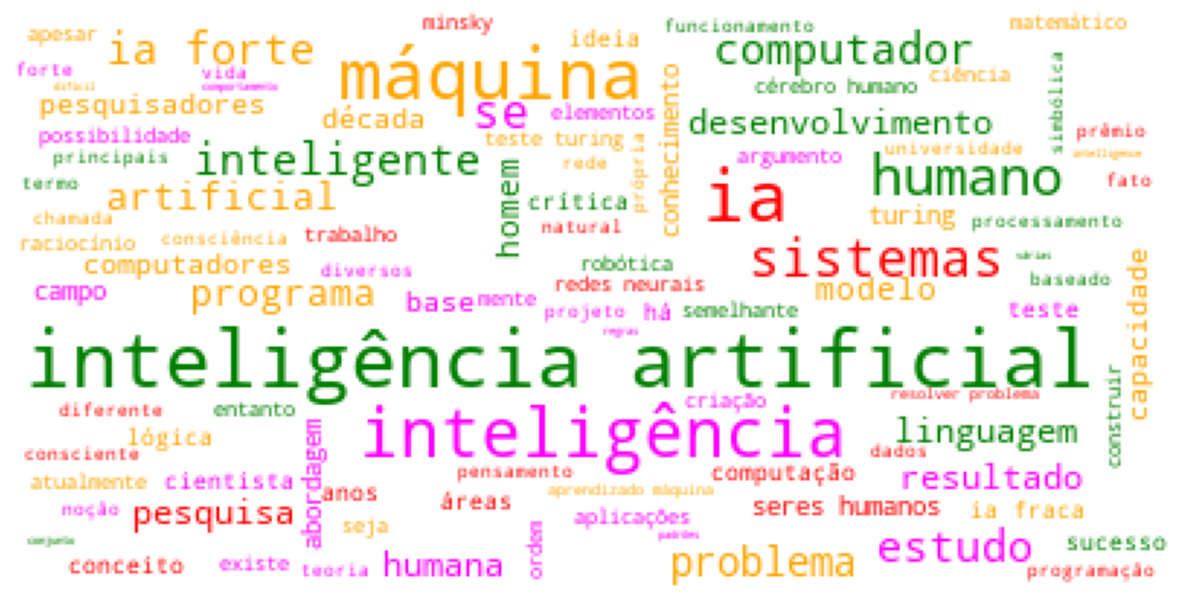

In [59]:
import matplotlib.pyplot as plt

cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()